In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [127]:
# fardina has a priming question before the AITA questions

df1 = pd.read_csv('data/max_spring2025.csv')
df2 = pd.read_csv('data/max_all.csv')
df3 = pd.read_csv('data/fardina_all.csv')
df4 = pd.read_csv('data/2024.csv')

In [128]:
df1.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       'My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-moth

In [129]:
df2.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness / spirituality?',
       'What bests represents your gender?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. He

In [130]:
df3.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness / spirituality?',
       'What bests represents your gender?',
       'Would you describe yourself as compassionate?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her

In [131]:
df4.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       'My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-moth

In [132]:
#exact phrasings for df1 questions
questions = [
    'Timestamp', 
    'What year are you?', 
    'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
      "My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?",
       "My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-mother practically raised him from a baby and I think that she deserves it far more than me. He was really upset and hurt when I said no. Am I a jerk?'",
       "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my boyfriend, who comes from a poor family, and we split things 50-50. Recently, he found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making him split things 50/50. I told him it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?",
       "My husband and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My husband's son currently goes to a much less nice public school. My husband says I'm a jerk for not paying for his son to go to private school as well.",
       "I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?",
       "My brother's nine year old son is poorly behaved. One day, my brother dropped the son off on my doorstep without my consent and drove off, texting me that he needed me to watch his son for the day. The son complained of being hungry, so I gave him the leftovers I had. He said he didn't like them, but I told him that's all there was. He put them in the microwave until they burned, then told me he couldn't eat them and we would have to go out and get food. I told him that was what there was to eat, and if he ruined it he'd have to wait for his dad to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?",
       "My parents want us to come out for their anniversary, and bought my brother and I tickets on the same flight. My brother has two kids - a 6 month old and a 5 year old. He is currently separated from his wife so he would have to handle 2 children by herself on a 10 hour flight.\n\nHe calls me up a week or so beforehand and asks me if I will be willing to help him take care of his kids on the flight, and something about taking shifts so we can both sleep. I tell him that I wasn't comfortable with that, but he says 'nephew loves you so much' so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my brother. Am I a jerk?",
       "I'm a single dad with four kids, one of whom has a different mother from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?",
       "I have a child with a father who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's father to make sure he's paying adequate child support. Periodically I either hire an investigator or her dad just tells me he got a raise and I go to court to adjust the child support accordingly. The last time I did this, he didn't show up for court and I apparently overestimated how much his raise was and I got a default judgment. He called me up and practically pleaded with me to lower his payments after I said no he insulted me and my son. Am I a jerk?",
       "One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for him schooling unless he picked a career path that will make at least 100,000 a year. Am I a jerk?",
       "I was in a conflict with my father-in-law's girlfriend, in which I made a snide comment about she's never paid child support to his ex. Later, she called me and told me if I ever said anything like that ever again she'd sue me for defamation. I took the threat seriously, as she is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?",
       "Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?",
       "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?",
       "My brother is going to be a groomsman at my wedding. His hair was dyed, but he recently decided to grow it out, so parts of it are bleached and part are not. I told him it wouldn't look good in the pictures, and offered to pay for him to dye it. He said no, and I said he couldn't be in the wedding party. Am I a jerk?",
      ]

questions_succint = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

questions_succint_primer = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "compassion primer",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

aita_questions = [
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

In [133]:
df1.columns = questions_succint
df2.columns = questions_succint
df3.columns = questions_succint_primer
df4.columns = questions_succint

In [134]:
personal = [
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
]

In [135]:
df3_clean = df3.drop(columns=["compassion primer"])

In [166]:
age_range = ["19","19.0","20","20.0","21","21.0", 19, 20, 21]
df1_clean = df1[df1["age"].isin(age_range)]
df2_clean = df2[df2["age"].isin(age_range)]
df3_clean = df3_clean[df3_clean["age"].isin(age_range)]
df4_clean = df4[df4["age"].isin(age_range)]

In [137]:
for df in [df1_clean, df2_clean, df3_clean, df4_clean]:
    df["age"] = df["age"].apply(lambda x: str(float(x)))

C:\Users\jonat\AppData\Local\Temp\ipykernel_8744\2575934483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["age"].apply(lambda x: str(float(x)))


In [138]:
for df in [df1_clean, df2_clean, df3_clean, df4_clean]:
    df["gender"] = df["gender"].apply(lambda x: x if x != "Famale" else "Female")

C:\Users\jonat\AppData\Local\Temp\ipykernel_8744\4017716602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"] = df["gender"].apply(lambda x: x if x != "Famale" else "Female")


In [139]:
df1_clean = df1_clean[df1_clean["gender"].isin(["Male", "Female"])]
df2_clean = df2_clean[df2_clean["gender"].isin(["Male", "Female"])]
df3_clean = df3_clean[df3_clean["gender"].isin(["Male", "Female"])]
df4_clean = df4_clean[df4_clean["gender"].isin(["Male", "Female"])]

In [140]:
df1_clean = df1_clean[df1_clean["year"].isin(["Junior", "Senior", "Sophmore"])]
df2_clean = df2_clean[df2_clean["year"].isin(["Junior", "Senior", "Sophmore"])]
df3_clean = df3_clean[df3_clean["year"].isin(["Junior", "Senior", "Sophmore"])]
df4_clean = df4_clean[df4_clean["year"].isin(["Junior", "Senior", "Sophmore"])]

In [141]:
df_religious_questions = pd.concat([df1_clean, df4_clean], axis=0).reset_index(drop=True)
df_spiritual_questions = pd.concat([df2_clean, df3_clean], axis=0).reset_index(drop=True)

In [142]:
for i in aita_questions:
    data = pd.crosstab(df_religious_questions[i], df_religious_questions['religion'])
    print(data)
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

religion         Not religious at all  Somewhat religious  Strongly religious
doctor                                                                       
Mildly a jerk                      16                  11                   3
Not a jerk                         18                  17                   7
Strongly a jerk                     3                   1                   0
doctor
p value is 0.6626445896550159
Independent (H0 holds true)

religion         Not religious at all  Somewhat religious  Strongly religious
reading                                                                      
Mildly a jerk                      15                  14                   3
Not a jerk                         16                  14                   5
Strongly a jerk                     6                   1                   2
reading
p value is 0.4561249834126706
Independent (H0 holds true)

religion         Not religious at all  Somewhat religious  Strongly religious
trust fun

In [143]:
for i in aita_questions:
    data = pd.crosstab(df_spiritual_questions[i], df_spiritual_questions['religion'])
    print(data)
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

religion         Not spiritual at all  Somewhat spiritual  Strongly spiritual
doctor                                                                       
Mildly a jerk                      43                  49                  16
Not a jerk                         36                  29                  14
Strongly a jerk                     8                   5                   0
doctor
p value is 0.33251040038472235
Independent (H0 holds true)

religion         Not spiritual at all  Somewhat spiritual  Strongly spiritual
reading                                                                      
Mildly a jerk                      37                  32                  15
Not a jerk                         41                  36                  11
Strongly a jerk                     9                  15                   4
reading
p value is 0.543232449110432
Independent (H0 holds true)

religion         Not spiritual at all  Somewhat spiritual  Strongly spiritual
trust fun

In [144]:
# Not a jerk = 0, Mildly a jerk = 1, Strongly a jerk = 2
aita_values = [aita_questions[i] + " numeric" for i in range(len(aita_questions))] 

In [145]:
for i in range(len(aita_questions)):
    df_religious_questions[aita_values[i]] = df_religious_questions[aita_questions[i]].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})
    df_spiritual_questions[aita_values[i]] = df_spiritual_questions[aita_questions[i]].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})

In [146]:
for i in aita_values:
    df_temp = pd.DataFrame({"rel": ["religious"] * len(df_religious_questions[i]) + ["spiritual"] * len(df_spiritual_questions[i]),
                        "response": list(df_religious_questions[i]) + list(df_spiritual_questions[i])})
    
    data = pd.crosstab(df_temp["response"], df_temp["rel"])
    print(data.head())
    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

rel       religious  spiritual
response                      
0.0              42         79
1.0              30        108
2.0               4         13
doctor numeric
p value is 0.06134888627306393
Independent (H0 holds true)

rel       religious  spiritual
response                      
0.0              35         88
1.0              32         84
2.0               9         28
reading numeric
p value is 0.8853668522237756
Independent (H0 holds true)

rel       religious  spiritual
response                      
0.0              39         88
1.0              24         71
2.0              13         41
trust fund numeric
p value is 0.5458167298207843
Independent (H0 holds true)

rel       religious  spiritual
response                      
0.0              52         93
1.0              16         69
2.0               8         35
private school numeric
p value is 0.007046308782461185
Dependent (reject H0)

rel       religious  spiritual
response                      
0.0         

My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?


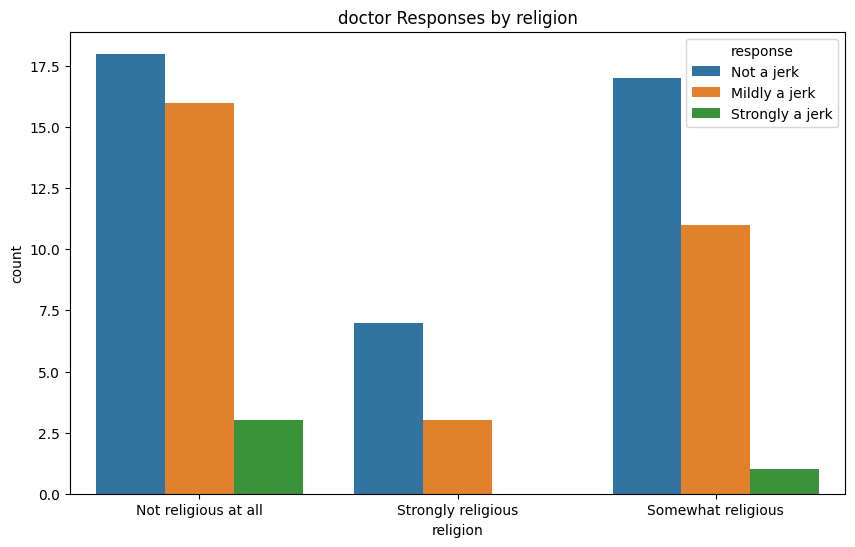

My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-mother practically raised him from a baby and I think that she deserves it far more than me. He was really upset and hurt when I said no. Am I a jerk?'


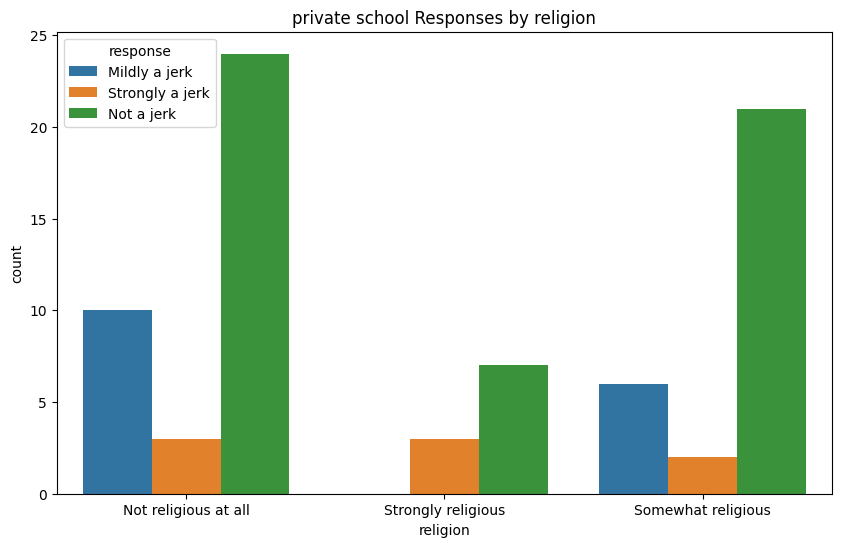

I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my boyfriend, who comes from a poor family, and we split things 50-50. Recently, he found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making him split things 50/50. I told him it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?


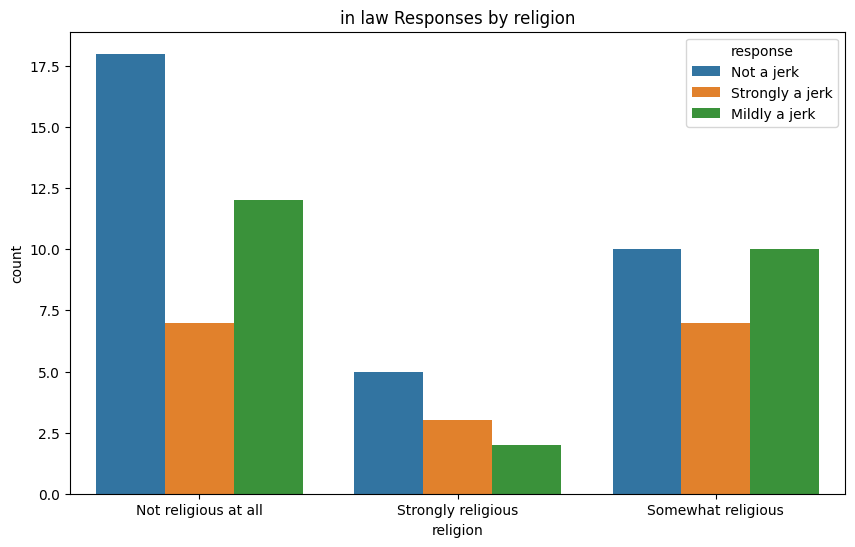

My husband and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My husband's son currently goes to a much less nice public school. My husband says I'm a jerk for not paying for his son to go to private school as well.


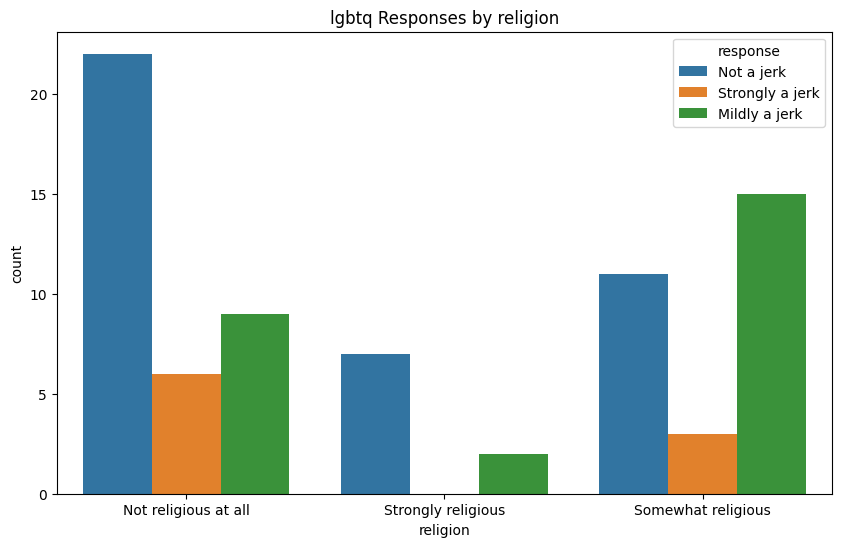

I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?


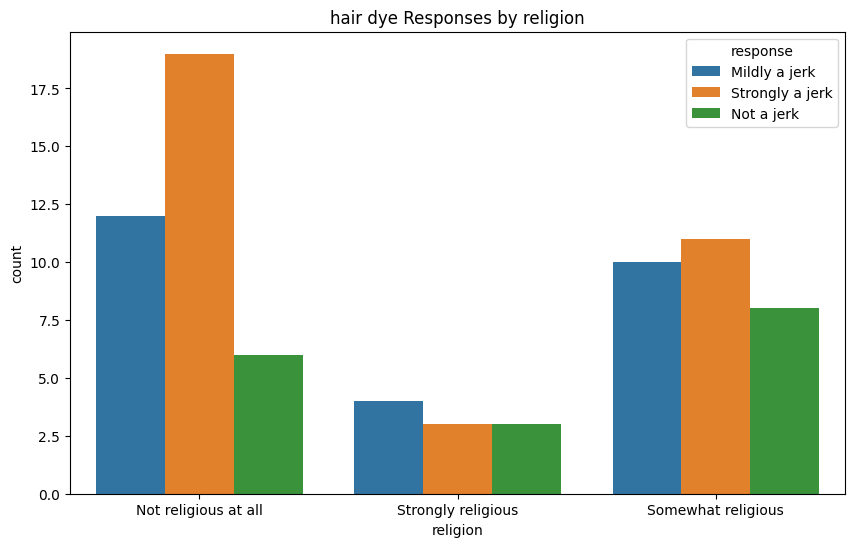

In [147]:
sort_by = 'religion'
diffs = ["doctor", "private school", "in law", "lgbtq", "hair dye"]
for i in range(len(diffs)):
    print(questions[i+7])
    df_melted = df_religious_questions.melt(id_vars=[sort_by], value_vars=[diffs[i]], var_name='question', value_name='response')

    plt.figure(figsize=(10,6))
    sns.countplot(data=df_melted, x=sort_by, hue='response')
    plt.title(diffs[i] + ' Responses by ' + sort_by)
    plt.show()

response   Mildly a jerk  Not a jerk  Strongly a jerk
rel                                                  
religious             30          42                4
spiritual            108          79               13


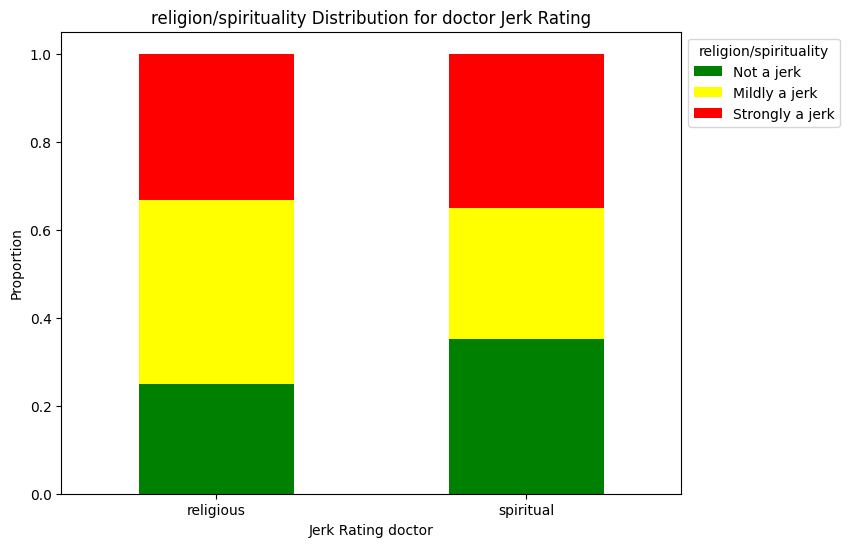

response   Mildly a jerk  Not a jerk  Strongly a jerk
rel                                                  
religious             16          52                8
spiritual             69          93               35


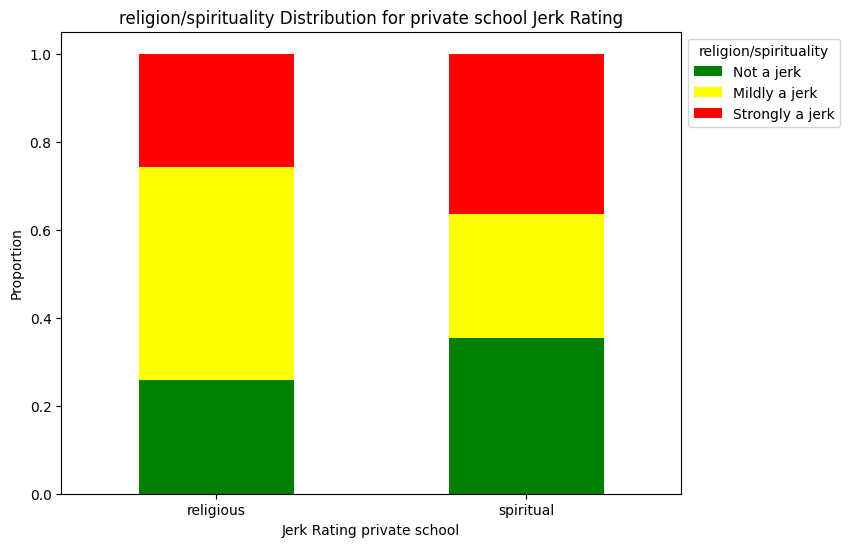

response   Mildly a jerk  Not a jerk  Strongly a jerk
rel                                                  
religious             24          33               17
spiritual             57         127               11


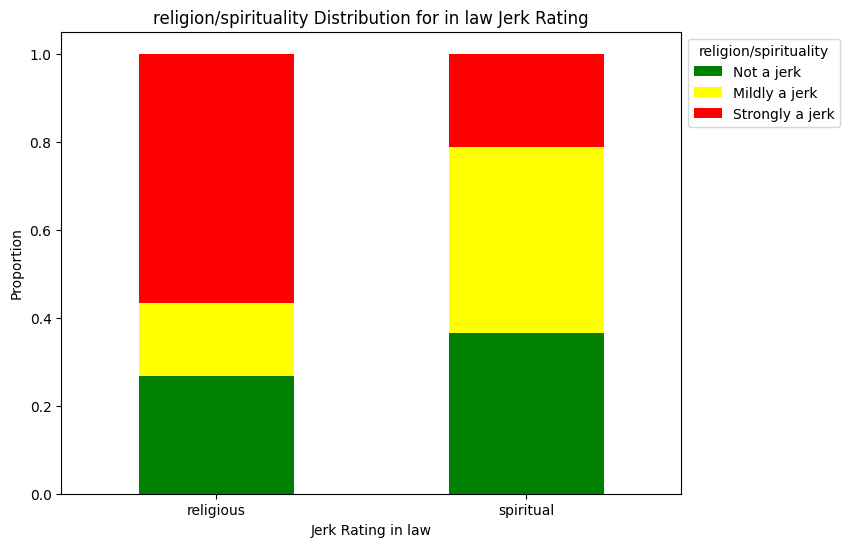

response   Mildly a jerk  Not a jerk  Strongly a jerk
rel                                                  
religious             26          40                9
spiritual             52         123               22


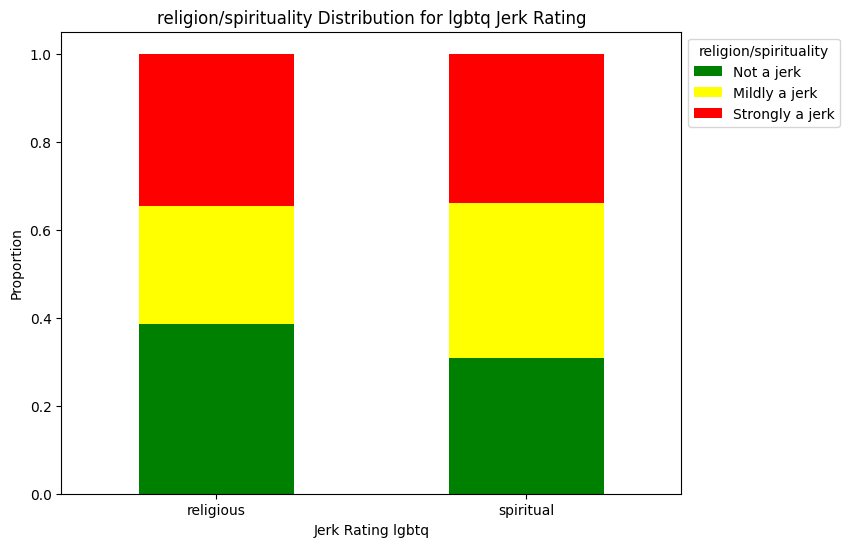

response   Mildly a jerk  Not a jerk  Strongly a jerk
rel                                                  
religious             26          17               33
spiritual             55          29              112


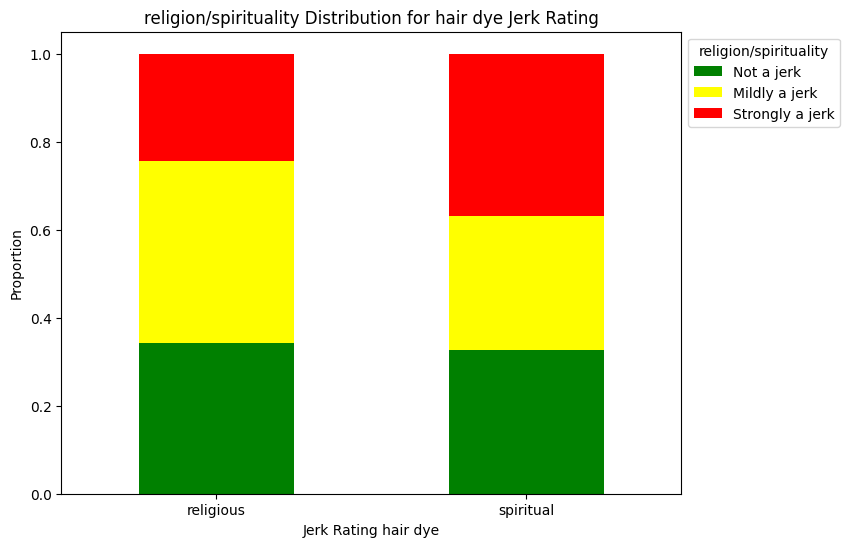

In [163]:
stack_order = ["Not a jerk", "Mildly a jerk", "Strongly a jerk"]

color = {
   "Not a jerk": "green",
    "Mildly a jerk": "yellow",
    "Strongly a jerk": "red"
}

for i in ["doctor", "private school", "in law", "lgbtq", "hair dye"]:
    df_temp = pd.DataFrame({"rel": ["religious"] * len(df_religious_questions[i]) + ["spiritual"] * len(df_spiritual_questions[i]),
                        "response": list(df_religious_questions[i]) + list(df_spiritual_questions[i])})
    
    group_counts = df_temp.groupby(["rel", "response"]).size().unstack(fill_value=0)
    print(group_counts)
    min_group_size = group_counts.sum(axis=0).min()
    normalized_counts = (group_counts.div(group_counts.sum(axis=0), axis=1) * min_group_size).astype(int)

    normalized_proportions = normalized_counts.div(normalized_counts.sum(axis=1), axis=0)

    ax = normalized_proportions.plot(
        kind='bar', stacked=True, color=[color[cat] for cat in stack_order], figsize=(8, 6)
    )

    plt.ylabel("Proportion")
    plt.xlabel("Jerk Rating " + i)
    plt.title(f"religion/spirituality Distribution for {i} Jerk Rating")
    plt.legend(title=f"religion/spirituality", labels=stack_order, loc='upper left', bbox_to_anchor=(1,1))
    plt.xticks(rotation=0)
    plt.show()



rel              religious  spiritual
response                             
Mildly a jerk           30        108
Not a jerk              42         79
Strongly a jerk          4         13


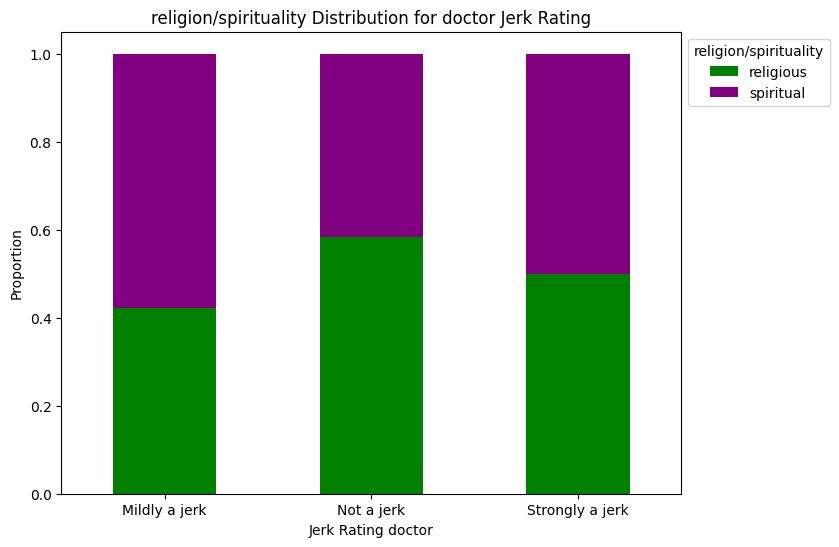

rel              religious  spiritual
response                             
Mildly a jerk           16         69
Not a jerk              52         93
Strongly a jerk          8         35


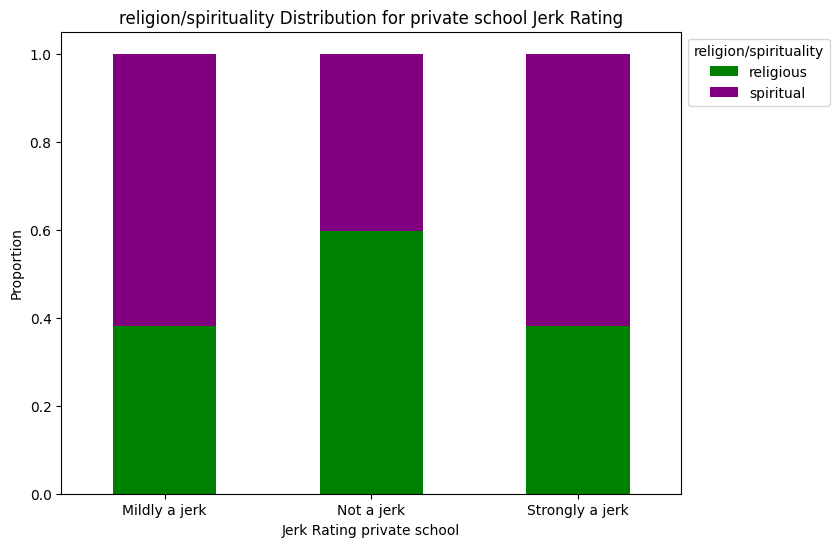

rel              religious  spiritual
response                             
Mildly a jerk           24         57
Not a jerk              33        127
Strongly a jerk         17         11


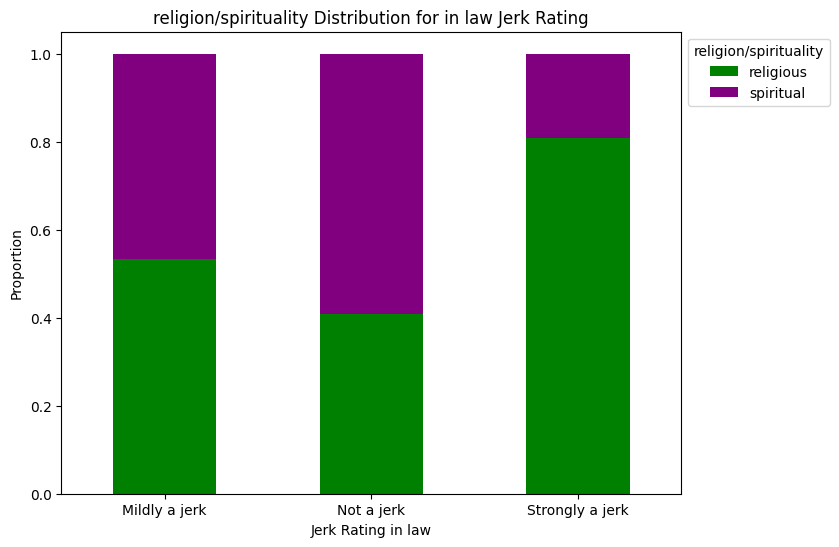

rel              religious  spiritual
response                             
Mildly a jerk           26         52
Not a jerk              40        123
Strongly a jerk          9         22


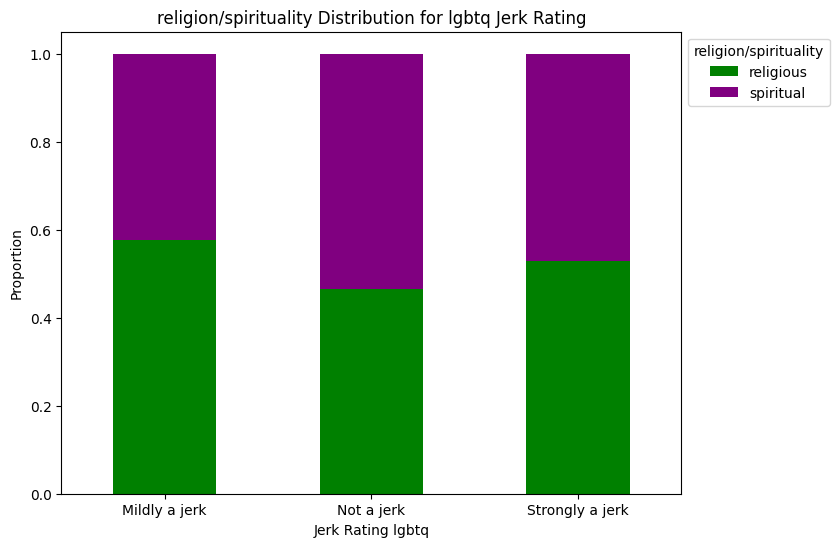

rel              religious  spiritual
response                             
Mildly a jerk           26         55
Not a jerk              17         29
Strongly a jerk         33        112


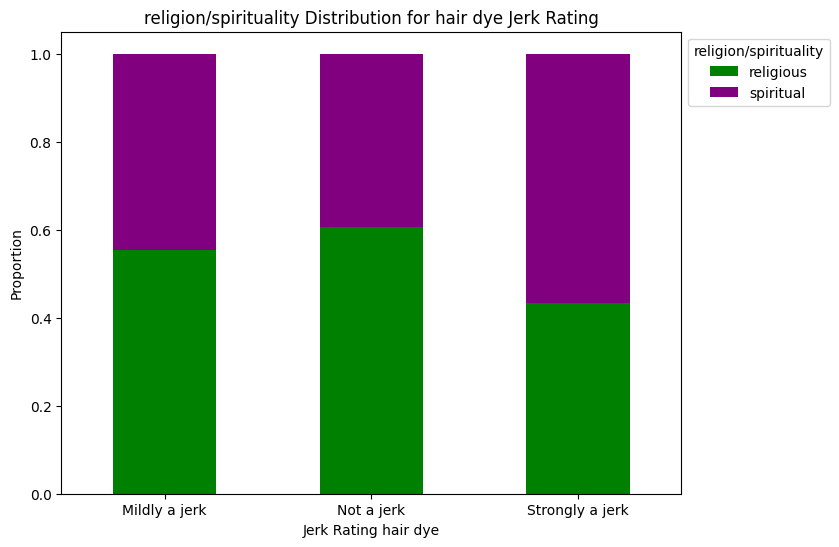

In [165]:
stack_order = ["religious", "spiritual"]

color = {
   "religious": "green",
    "spiritual": "purple"
}

for i in ["doctor", "private school", "in law", "lgbtq", "hair dye"]:
    df_temp = pd.DataFrame({"rel": ["religious"] * len(df_religious_questions[i]) + ["spiritual"] * len(df_spiritual_questions[i]),
                        "response": list(df_religious_questions[i]) + list(df_spiritual_questions[i])})
    
    group_counts = df_temp.groupby(["response", "rel"]).size().unstack(fill_value=0)
    print(group_counts)
    min_group_size = group_counts.sum(axis=0).min()
    normalized_counts = (group_counts.div(group_counts.sum(axis=0), axis=1) * min_group_size).astype(int)

    normalized_proportions = normalized_counts.div(normalized_counts.sum(axis=1), axis=0)

    ax = normalized_proportions.plot(
        kind='bar', stacked=True, color=[color[cat] for cat in stack_order], figsize=(8, 6)
    )

    plt.ylabel("Proportion")
    plt.xlabel("Jerk Rating " + i)
    plt.title(f"religion/spirituality Distribution for {i} Jerk Rating")
    plt.legend(title=f"religion/spirituality", labels=stack_order, loc='upper left', bbox_to_anchor=(1,1))
    plt.xticks(rotation=0)
    plt.show()



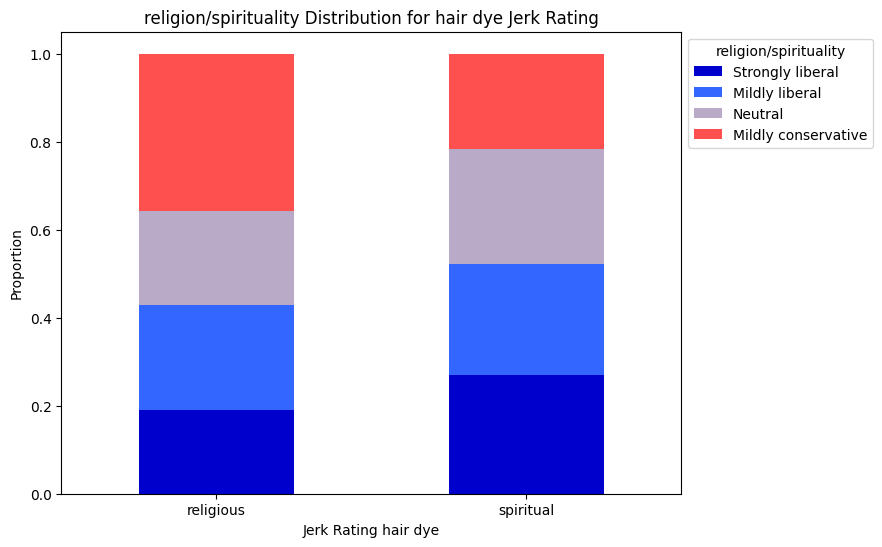

In [149]:
stack_order = [
    "Strongly liberal",
    "Mildly liberal",
    "Neutral",
    "Mildly conservative",
]

# Assign corresponding colors
political_colors = {
    "Strongly liberal": "#0000cc",  # Deep Blue
    "Mildly liberal": "#3366ff",    # Medium Blue
    "Neutral": "#666666",           # Dark Gray
    "Don't know / It's complicated": "#ffcc00",  # Yellow
    "Mildly conservative": "#ff5050",  # Medium Red
    "Strongly conservative": "#cc0000"  # Deep Red
}

color = {
"Strongly liberal": "#0000cc",  # Deep Blue
"Mildly liberal": "#3366ff",    # Medium Blue
"Neutral": "#b9abc8",           # Dark Gray
"Mildly conservative": "#ff5050",  # Medium Red
}

d = {"rel": ["religious"] * len(df_religious_questions[i]) + ["spiritual"] * len(df_spiritual_questions[i])}
d.update({i: list(df_religious_questions[i]) + list(df_spiritual_questions[i]) for i in questions_succint})

df_religious = pd.DataFrame(d)
df_religious_clean = df_religious[df_religious["self"].isin(stack_order)]

group_counts = df_religious_clean.groupby(["rel", "self"]).size().unstack(fill_value=0)
min_group_size = group_counts.sum(axis=0).min()
normalized_counts = (group_counts.div(group_counts.sum(axis=0), axis=1) * min_group_size).astype(int)

normalized_proportions = normalized_counts.div(normalized_counts.sum(axis=1), axis=0)
normalized_proportions = normalized_proportions[stack_order]

ax = normalized_proportions.plot(
    kind='bar', stacked=True, color=[color[cat] for cat in stack_order], figsize=(8, 6)
)

plt.ylabel("Proportion")
plt.xlabel("Jerk Rating " + i)
plt.title(f"religion/spirituality Distribution for {i} Jerk Rating")
plt.legend(title=f"religion/spirituality", labels=stack_order, loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.show()



In [162]:
for i in questions_succint:
    data = pd.crosstab(df_religious_clean["rel"], df_religious_clean[i])

    stat, p, dof, expected = chi2_contingency(data)

    print(i)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

time
p value is 0.4707796544966149
Independent (H0 holds true)

year
p value is 1.0061833997680942e-16
Dependent (reject H0)

age
p value is 0.0009551656221582098
Dependent (reject H0)

upbringing
p value is 0.6650836284705525
Independent (H0 holds true)

self
p value is 0.3194838420620375
Independent (H0 holds true)

religion
p value is 6.436558193317178e-54
Dependent (reject H0)

gender
p value is 0.7358992957877923
Independent (H0 holds true)

doctor
p value is 0.0632690280493498
Independent (H0 holds true)

reading
p value is 0.9226205140305956
Independent (H0 holds true)

trust fund
p value is 0.6452351730672475
Independent (H0 holds true)

private school
p value is 0.004663870086845112
Dependent (reject H0)

cat
p value is 0.08651897013864698
Independent (H0 holds true)

burned food
p value is 0.9506337173690235
Independent (H0 holds true)

flight
p value is 0.8411371641467006
Independent (H0 holds true)

child support
p value is 0.6091162612790799
Independent (H0 holds true)

in

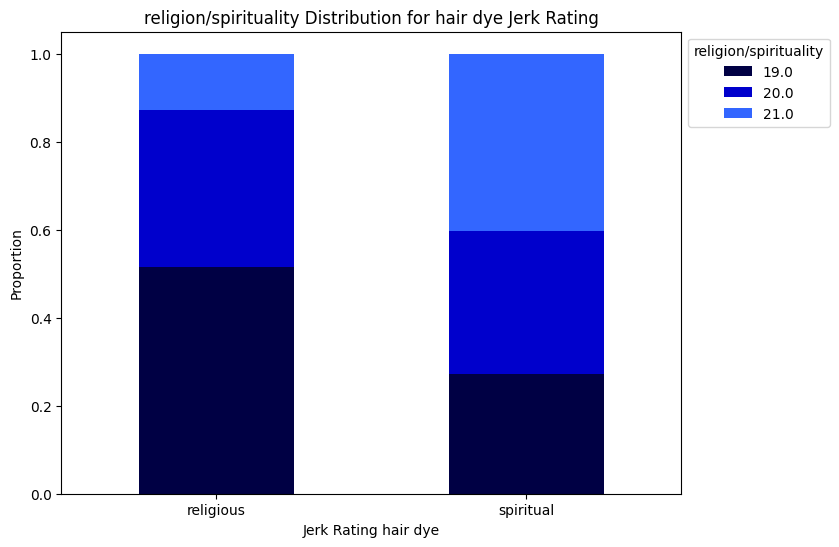

In [158]:
stack_order = [str(float(i)) for i in range(19, 22)]

color = {
    "19.0": "#000044",
    "20.0": "#0000cc",
    "21.0": "#3366ff",
}

d = {"rel": ["religious"] * len(df_religious_questions[i]) + ["spiritual"] * len(df_spiritual_questions[i])}
d.update({i: list(df_religious_questions[i]) + list(df_spiritual_questions[i]) for i in questions_succint})

df_temp = pd.DataFrame(d)

group_counts = df_temp.groupby(["rel", "age"]).size().unstack(fill_value=0)
min_group_size = group_counts.sum(axis=0).min()
normalized_counts = (group_counts.div(group_counts.sum(axis=0), axis=1) * min_group_size).astype(int)

normalized_proportions = normalized_counts.div(normalized_counts.sum(axis=1), axis=0)
normalized_proportions = normalized_proportions[stack_order]

ax = normalized_proportions.plot(
    kind='bar', stacked=True, color=[color[cat] for cat in stack_order], figsize=(8, 6)
)

plt.ylabel("Proportion")
plt.xlabel("Jerk Rating " + i)
plt.title(f"religion/spirituality Distribution for {i} Jerk Rating")
plt.legend(title=f"religion/spirituality", labels=stack_order, loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.show()

